In [2]:
import random
import matplotlib.pyplot as plt

In [29]:
class Perceptron:
    """"Perceptron class with n input and one output"""
    def __init__(self,noOfInputs,bias = 0,learningRate = 0.1):
        self.inputs = noOfInputs
        self.weights = [random.random() * random.choice([-1,1]) * random.random() for i in range(noOfInputs)]
        self.bias = bias
        self.learningRate = learningRate
        print("Initial parameters\n\tweights={},bias={},learningRate={}".format(self.weights,self.bias,self.learningRate))
    
    def activation(self,raw):
        """"Activation function 1 if output is equal to or greater than zero else -1"""
        if raw>=0:
            return 1
        else:
            return -1

    def guess(self,inputs):
        """Guess the output for set of inputs"""
        raw =  0 
        for Input,weight in zip(inputs,self.weights):
            raw+=Input*weight
        return self.activation(raw)
    
    def train(self,inputs,outputs,accuracy=0.90):
        """train the Perceptron based on input and actual output """
        errorPercentage = 1;
        while errorPercentage > 1 - accuracy:
            testCounts = 0
            errorCounts = 0 
            for Input , output  in zip( inputs,outputs):
                guess = self.guess(Input)
                error = output - guess
                testCounts+=1 # to track number of testes
                if error!=0:
                    errorCounts+=1 # to track errors
                for  i in range(len(self.weights)):
                    self.weights[i] += error * self.learningRate * Input[i] + self.bias
            errorPercentage = errorCounts / testCounts # calculate actual error percentage
            print("errorPercentage={}".format(errorPercentage))
            
                

In [4]:
def show(inputX,inputY,outputs):
    """Plot the data to scattergraph"""
    if(max(inputX)>max(inputY)):
        plt.plot([0,max(inputX)],[0,max(inputX)])
    else:
        plt.plot([0,max(inputY)],[0,max(inputY)])
    for x,y,output in zip(inputX,inputY,outputs):
        if(output==1):
            plt.scatter(x,y,color="green")
        else:
            plt.scatter(x,y,color="red")
    

Initial parameters
	weights=[0.41122734552286, -0.9057153658933145],bias=0.6218433353512154,learningRate=0.1


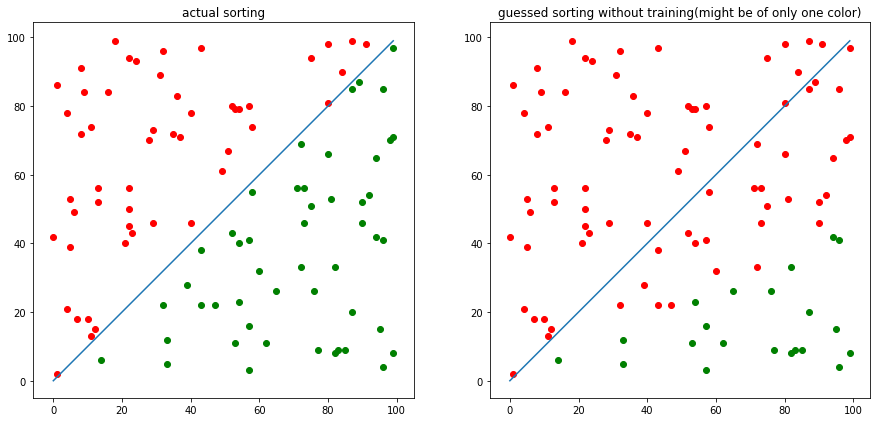

In [43]:
sampleSize = 100 # no of train data
percep = Perceptron(2,bias=random.random() * random.choice([-1,1]) ) #perceptron object with 2 input nodes and random bias

#generate train data 
train_inputX = [random.randint(0,100) for x in range(sampleSize) ] 
train_inputY = [random.randint(0,100) for Y in range(sampleSize) ]
actual_outputs = [1 if x>=y else -1 for x,y in zip(train_inputX,train_inputY) ] 

guesses = [ percep.guess([x,y]) for x,y in zip(train_inputX,train_inputY)] #initial guess of the perceptron

# show actual output
fig = plt.figure(figsize=(15,15)) 
plt.subplot(121,aspect="equal").set_title("actual sorting")
show(train_inputX,train_inputY,actual_outputs)

# show initial Guess of perceptron
plt.subplot(122,aspect="equal").set_title("guessed sorting without training(might be of only one color)")
show(train_inputX,train_inputY,guesses)
    
plt.show()

In [44]:
# train the peceptron using train data
percep.train( inputs = [[x,y] for x,y in zip(train_inputX,train_inputY)],outputs=actual_outputs,accuracy=0.90) 

errorPercentage=0.17
errorPercentage=0.15
errorPercentage=0.09


accuracy=0.95


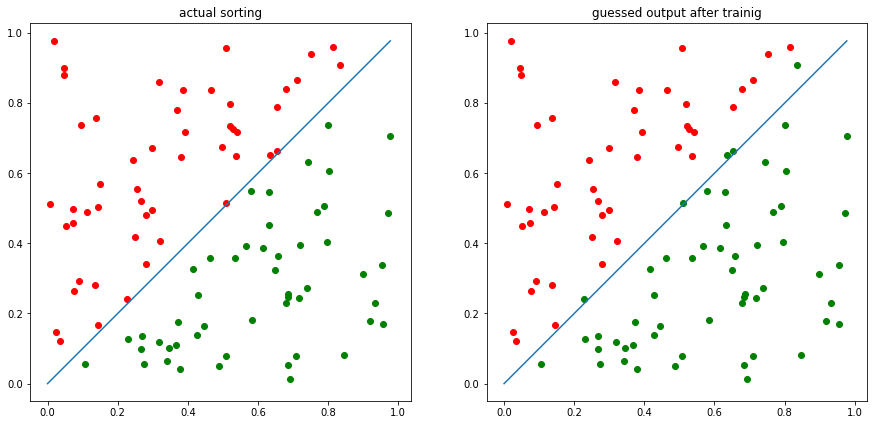

In [45]:
# gererate test data 
test_inputX = [random.random() for x in range(sampleSize) ] 
test_inputY = [random.random() for Y in range(sampleSize) ]
actual_outputs = [1 if x>=y else -1 for x,y in zip(test_inputX,test_inputY) ]
guesses = [ percep.guess([x,y]) for x,y in zip(test_inputX,test_inputY)]

total_test_cases = len(test_inputX)
right_count=0
for result,guess in zip(actual_outputs,guesses):
    if result==guess:
        right_count+= 1

print("accuracy={}".format(right_count/total_test_cases))
# show actual output
fig = plt.figure(figsize=(15,15)) 
plt.subplot(121,aspect="equal").set_title("actual sorting")
show(test_inputX,test_inputY,actual_outputs)

# show initial Guess of perceptron
plt.subplot(122,aspect="equal").set_title("guessed output after trainig")
show(test_inputX,test_inputY,guesses)
plt.show()